# Notebook for plotting results of filtering with noise

In [68]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

module_path = os.path.abspath(os.path.join('../..'))
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 11, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)

figure_path = module_path + '/figures/'

def get_plotable_arrays(result_dict):
    noise = []
    clf_dict = {k : [] for k in result_dict[list(result_dict.keys())[0]].keys()}
    for n, subdict in result_dict.items():
        noise.append(n)
        for clf, res in subdict.items():
            clf_dict[clf].append(res)
    return noise, clf_dict

# Plotting AUC score simulated data

In [69]:
a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_lr_amplitude.pkl', 'rb')
simulated_data_original_amplitude = pickle.load(a_file)
simulated_data_lr_amplitude = pickle.load(a_file)
simulated_data_lr_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_lr_amount.pkl', 'rb')
simulated_data_original_amount = pickle.load(a_file)
simulated_data_lr_amount = pickle.load(a_file)
simulated_data_lr_amount_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_cluster_amplitude.pkl', 'rb')
_ = pickle.load(a_file)
simulated_data_clustering_amplitude = pickle.load(a_file)
simulated_data_clustering_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_cluster_amount.pkl', 'rb')
_ = pickle.load(a_file)
simulated_data_clustering_amount = pickle.load(a_file)
simulated_data_clustering_amount_removed = pickle.load(a_file)


results_amplitude = {
    'Cluster filter' : simulated_data_clustering_amplitude,
    'LR filter': simulated_data_lr_amplitude,
    'Original': simulated_data_original_amplitude
}

results_amount = {
    'Cluster filter' : simulated_data_clustering_amount,
    'LR filter': simulated_data_lr_amount,
    'Original': simulated_data_original_amount
}

results_removed_amount_of_data_amplitude_noise = {
    'Cluster filter' :  simulated_data_clustering_amplitude_removed, 
    'LR filter' : simulated_data_lr_amplitude_removed
}


results_removed_amount_of_data_amount_noise = {
    'Cluster filter' : simulated_data_clustering_amount_removed,
    'LR filter' : simulated_data_lr_amount_removed
}

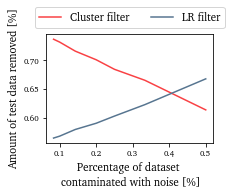

In [70]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_removed_amount_of_data_amount_noise.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Percentage of dataset \n contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)
f.savefig(figure_path + 'simulated_higher_amount_noise_removed.pdf', bbox_inches='tight')

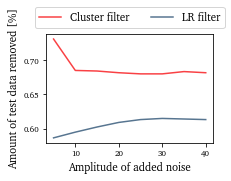

In [71]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_removed_amount_of_data_amplitude_noise.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)
f.savefig(figure_path + 'simulated_higher_amplitude_noise_removed.pdf', bbox_inches='tight')

## Plotting results of adding noise with a higher amplitude

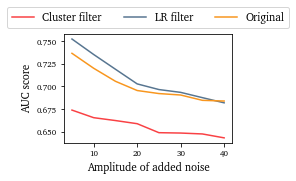

In [72]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amplitude.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)

f.savefig(figure_path + 'simulated_data_higher_amplitude_noise.pdf', bbox_inches='tight')

## Plotting results of adding more noise

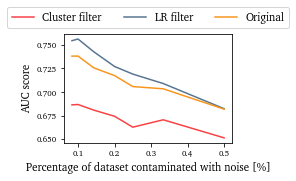

In [73]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amount.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Percentage of dataset contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)

f.savefig(figure_path + 'simulated_data_more_noise.pdf', bbox_inches='tight')

# Lung sound dataset

In [74]:
a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_lr_amplitude.pkl', 'rb')
lung_original_amplitude = pickle.load(a_file)
lung_lr_amplitude = pickle.load(a_file)
lung_lr_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_lr_amount.pkl', 'rb')
lung_original_amount = pickle.load(a_file)
lung_lr_amount = pickle.load(a_file)
lung_lr_amount_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_cluster_amplitude.pkl', 'rb')
_ = pickle.load(a_file)
lung_cluster_amplitude = pickle.load(a_file)
lung_cluster_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_cluster_amount.pkl', 'rb')
_ = pickle.load(a_file)
lung_cluster_amount = pickle.load(a_file)
lung_cluster_amount_removed = pickle.load(a_file)


results_amplitude = {
    'Cluster filter' : lung_cluster_amplitude,
    'LR filter': lung_lr_amplitude,
    'Original': lung_original_amplitude
}

results_amount = {
    'Cluster filter' : lung_cluster_amount,
    'LR filter': lung_lr_amount,
    'Original': lung_original_amount
}

results_removed_amount_of_data_amplitude_noise = {
    'Cluster filter' :  lung_cluster_amplitude_removed, 
    'LR filter' : lung_lr_amplitude_removed
}


results_removed_amount_of_data_amount_noise = {
    'Cluster filter' : lung_cluster_amount_removed,
    'LR filter' : lung_lr_amount_removed
}

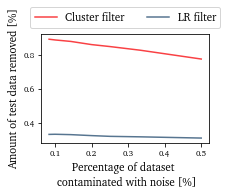

In [75]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_removed_amount_of_data_amount_noise.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Percentage of dataset \n contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)
f.savefig(figure_path + 'lung_data_higher_amount_noise_removed.pdf', bbox_inches='tight')

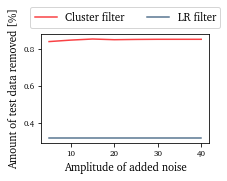

In [76]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_removed_amount_of_data_amplitude_noise.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)
f.savefig(figure_path + 'lung_data_higher_amplitude_noise_removed.pdf', bbox_inches='tight')

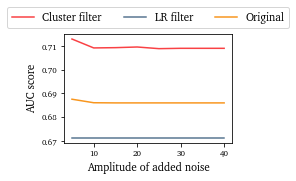

In [77]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amplitude.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)
f.savefig(figure_path + 'lung_data_higher_amplitude_noise.pdf', bbox_inches='tight')

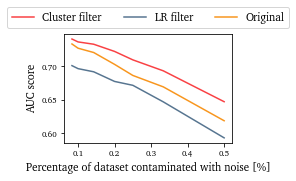

In [78]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amount.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Percentage of dataset contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)

f.savefig(figure_path + 'lung_data_more_noise.pdf', bbox_inches='tight')